hello , yash garg here

july 2024 batch

lets start with project-3 "IRIS DATASET ANALYSIS"


Importing modules


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**UPLODING DATASET**

In [ ]:
df = pd.read_csv('IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


displaying statistical  analysis



In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
# getting more info about dataset

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
# Checking number of each species

In [ ]:
df['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

**DATA PREPROCESSING **

In [ ]:
#Checking null values

In [ ]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

* total 150 enteris , 5 column
* no null values

In [ ]:
# removing duplicate values

In [ ]:
df[df.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [ ]:
df_copy = df.drop_duplicates(keep = 'first')

In [ ]:
df_copy["species"] = np.where(df_copy["species"] == "Iris-versicolor", "versicolor", df_copy["species"])

df_copy["species"] = np.where(df_copy["species"] == "Iris-virginica", "virginica", df_copy["species"])

df_copy["species"] = np.where(df_copy["species"] == "Iris-setosa", "setosa", df_copy["species"])



In [ ]:
df = df_copy

In [ ]:
df["species"].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

# Exploratory data analysis

<Axes: >

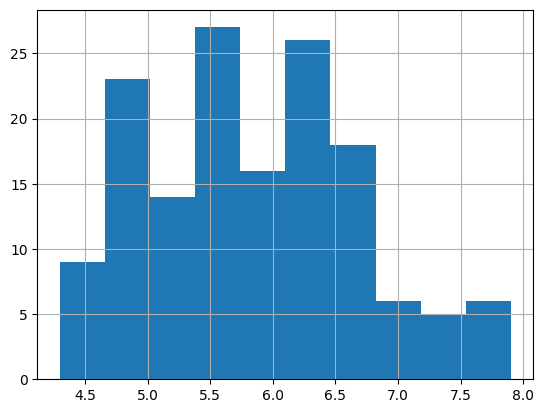

In [ ]:
# histograms
df['sepal_length'].hist()

<Axes: >

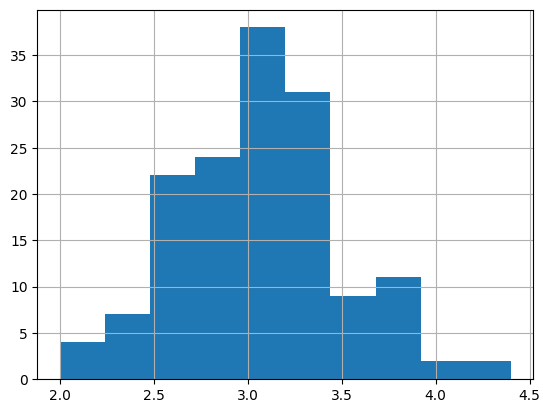

In [ ]:
df['sepal_width'].hist()

<Axes: >

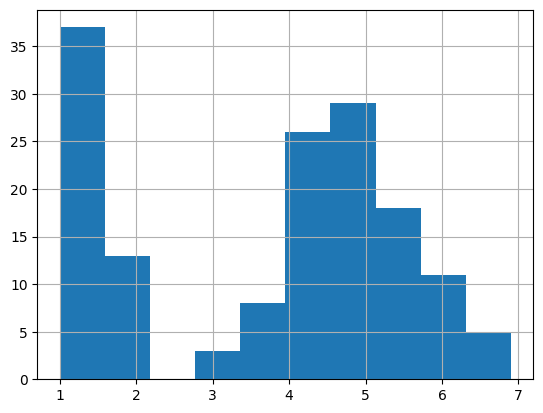

In [ ]:
df['petal_length'].hist()

<Axes: >

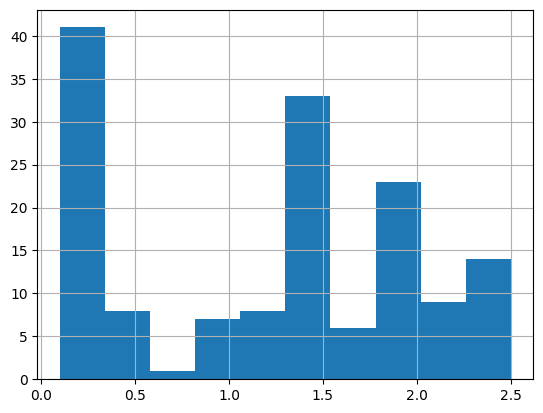

In [ ]:
df['petal_width'].hist()

In [ ]:
# both sepal length and width have normal distribution

In [ ]:
# both petal length and width have two separate bell as both have different species

In [ ]:
#creating  some scatter plots for
colors = ['orange', 'blue', 'yellow']
species = ['Iris-virginica', 'Iris-versicolor', 'Iris-setosa']

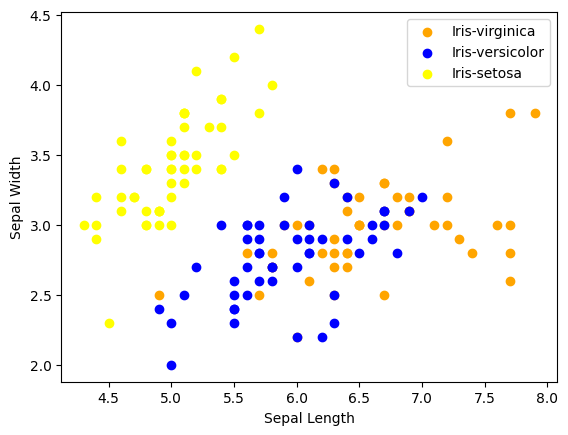

In [ ]:
for i in range(3):
    # filter data on each class
    x = df[df['species'] == species[i]]
    # plot the scatter plot
    plt.scatter(x['sepal_length'], x['sepal_width'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

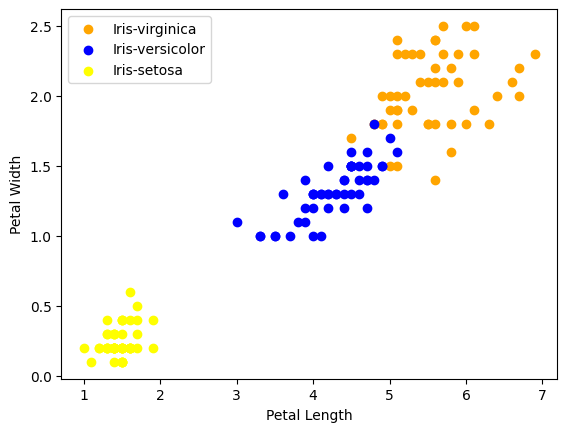

In [ ]:
for i in range(3):
    # filter data on each class
    x = df[df['species'] == species[i]]
    # plot the scatter plot
    plt.scatter(x['petal_length'], x['petal_width'], c = colors[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

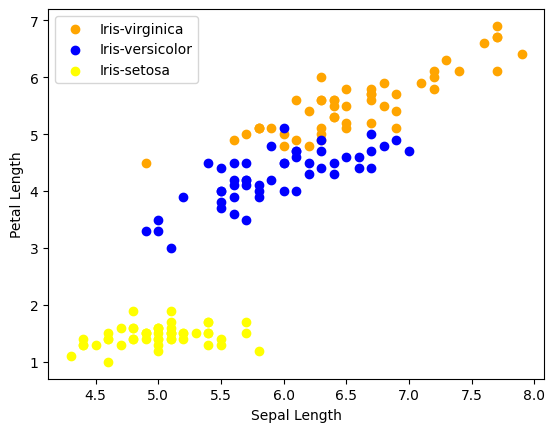

In [ ]:
for i in range(3):
    # filter data on each class
    x = df[df['species'] == species[i]]
    # plot the scatter plot
    plt.scatter(x['sepal_length'], x['petal_length'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

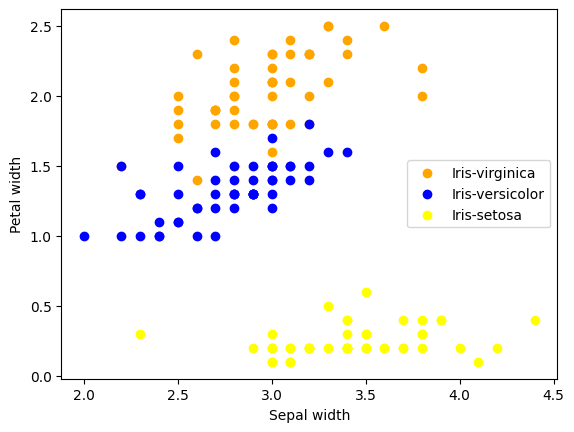

In [ ]:
for i in range(3):
    # filter data on each class
    x = df[df['species'] == species[i]]
    # plot the scatter plot
    plt.scatter(x['sepal_width'], x['petal_width'], c = colors[i], label=species[i])
plt.xlabel("Sepal width")
plt.ylabel("Petal width")
plt.legend()

In [ ]:
 # iris-setosa can be easily separable from other 2 classes , in petal_length vs petal_width plot without overlapping while in other they do

#**Correlation Matrix**

In [ ]:
# droping species
df.drop('species', axis= 1, inplace= True)

In [ ]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


In [ ]:
corr = df.corr()


<Axes: >

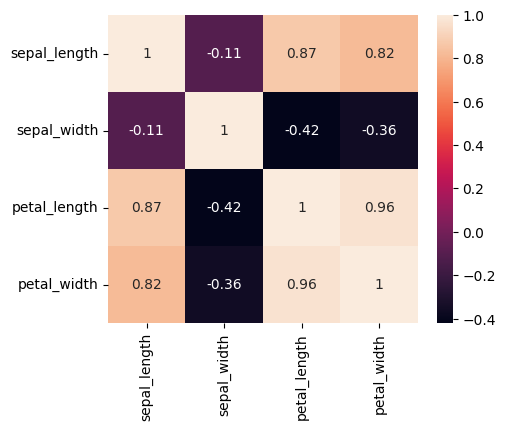

In [ ]:
# ploting  the heat map
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax)

*Petal length and petal width have high positive correlation of 0.96

*Sepal length have high positive correlation with petal length and petal width

*Sepal width have negative correlation with petal length and petal width

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# transform the string labels to integer
df['species'] = le.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# train test split

In [ ]:
from sklearn.model_selection import train_test_split
## train - 80%
## test - 20%

# input data
X = df.drop(columns=['species'])
# output data
Y = df['species']
# split the data for train and test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)

importing model and train

In [ ]:
# logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
# model training
model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  90.0


In [ ]:
# knn - k-nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(x_train, y_train)
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  93.33333333333333


In [ ]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  96.66666666666667


**EVEN ALL THREE HAVE HIGH ACCURACY BUT DECISON TREE HAVE HIGHEST ACCURACY**

In [ ]:
#Thanks with regards
#YASH GARG